In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.keys()
df = pd.DataFrame(data = iris['data'], columns=iris['feature_names'])
pt = pd.pivot_table(df, columns=['sepal length (cm)', 'petal length (cm)'])
pt

                  sepal length (cm)  petal length (cm)
sepal width (cm)  4.3                1.1                  3.000000
                  4.4                1.3                  3.100000
                                     1.4                  2.900000
                  4.5                1.3                  2.300000
                  4.6                1.0                  3.600000
                                     1.4                  3.300000
                                     1.5                  3.100000
                  4.7                1.3                  3.200000
                                     1.6                  3.200000
                  4.8                1.4                  3.000000
                                     1.6                  3.250000
                                     1.9                  3.400000
                  4.9                1.4                  3.000000
                                     1.5                  3.100000
       

In [21]:
pt1 = pd.pivot_table(df, columns='sepal length (cm)')
pt1

sepal length (cm),4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
petal length (cm),1.1,1.333333,1.3,1.325,1.45,1.58,2.283333,1.84,1.722222,2.075,...,5.400000,5.275,4.7,5.9,5.966667,6.3,6.1,6.6,6.60,6.4
petal width (cm),0.1,0.200000,0.3,0.225,0.20,0.20,0.533333,0.43,0.400000,0.475,...,1.933333,2.050,1.4,2.1,1.966667,1.8,1.9,2.1,2.20,2.0
sepal width (cm),3.0,3.033333,2.3,3.325,3.20,3.18,2.866667,3.12,3.477778,3.425,...,3.000000,3.125,3.2,3.0,3.266667,2.9,2.8,3.0,3.05,3.8


In [138]:
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [113]:
labels = iris.target
lb = []
for i in range(len(labels)):
    if labels[i] == 0:
        lb.append('setosa')
        
    elif labels[i] == 1:
        lb.append('versicolor')
    else:
        lb.append('virginica')

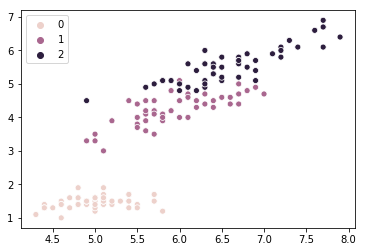

In [21]:
sns.scatterplot(x = iris['data'][:, 0], y = iris['data'][:, 2], hue = iris['target'])

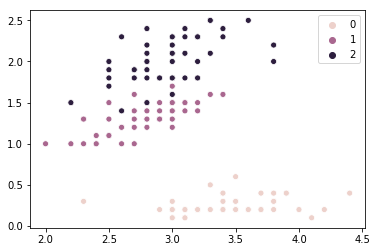

In [24]:
sns.scatterplot(x = iris['data'][:,1], y = iris['data'][:, 3], hue = iris['target'])

In [ ]:
sns.pairplot()

In [64]:
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
df.head()
classes = pd.DataFrame(data = iris.target)

In [67]:
scale = StandardScaler()

In [68]:
scale.fit(iris.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
scaled_data = scale.transform(iris.data)

In [139]:
scaled_dat = pd.DataFrame(scaled_data, columns=iris.feature_names)
scaled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [140]:
X_train, X_test, y_train, y_test = train_test_split(scaled_dat, iris.target, test_size = 0.35)

In [141]:
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    error_rate.append(np.mean(knn.predict(X_test) != y_test))

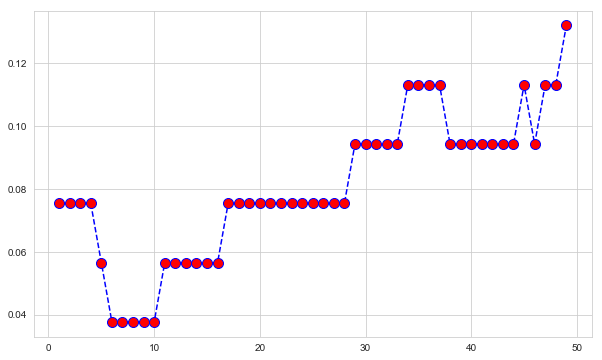

In [142]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.plot(range(1, 50),error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [143]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.89      0.94      0.91        17
          2       0.94      0.89      0.91        18

avg / total       0.94      0.94      0.94        53



In [132]:
confusion_matrix(y_test, knn.predict(X_test))

array([[17,  0,  0],
       [ 0, 21,  0],
       [ 0,  2, 13]], dtype=int64)